In [100]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
uber_data = pd.merge(city_data, ride_data, on='city', how='outer')
uber_types = uber_data[{'city', 'type'}]

# Display the data table for preview
uber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

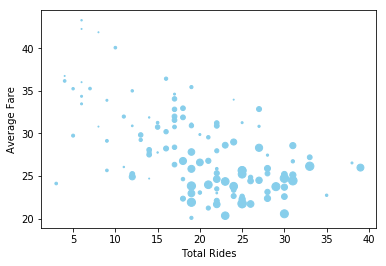

In [102]:
# Obtain the x and y coordinates for each of the three city types
uber_grouped = uber_data.groupby(['type','city'])

uber_avg_fare = uber_grouped['fare'].mean()
uber_avg_df = pd.DataFrame(uber_avg_fare)

uber_rides = uber_grouped['ride_id'].count()
uber_rides_df = pd.DataFrame(uber_rides)

uber_drivers = uber_grouped['driver_count'].mean()
uber_drivers_df = pd.DataFrame(uber_drivers)

uber_data_grouped = pd.merge(uber_avg_fare, uber_rides, on=['type', 'city'], how='outer')
uber_data_grouped = pd.merge(uber_data_grouped, uber_drivers_df, on=['type','city'], how='outer')
uber_data_grouped = uber_data_grouped.rename(columns= {'ride_id': 'Total Rides', 'fare': 'Average Fare', 'driver_count': 'Number of Drivers'})

uber_data_grouped['Total Rides'] = pd.to_numeric(uber_data_grouped['Total Rides'])
uber_data_grouped['Average Fare'] = pd.to_numeric(uber_data_grouped['Average Fare'])
uber_data_grouped['Number of Drivers'] = pd.to_numeric(uber_data_grouped['Number of Drivers'])

total_rides = uber_data_grouped['Total Rides']
average_fare = uber_data_grouped['Average Fare']
driver_number = uber_data_grouped['Number of Drivers']

# Build the scatter plots for each city types
uber_data_grouped.plot(kind='scatter', x='Total Rides', y='Average Fare', s=driver_number, colors='skyblue')

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

In [103]:
# Show plot
plt.show()

## Total Fares by City Type

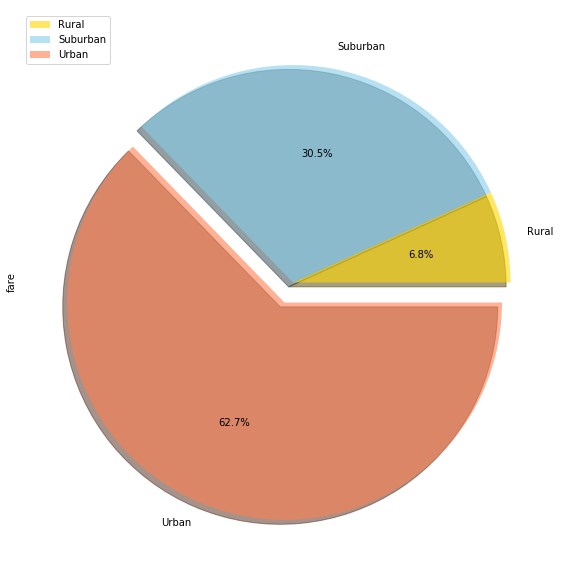

In [104]:
# Calculate Type Percents
total = uber_data['fare'].sum()
uber_fares_grouped = uber_data.groupby('type')
uber_fares = pd.DataFrame(uber_fares_grouped.sum())

# Build Pie Chart
uber_fares.plot(kind='pie', y='fare', autopct='%0.001f%%', explode=[0,0,0.1], 
                shadow=True, figsize=(10,10), colors=['gold', 'skyblue', 'coral'], wedgeprops={'alpha':0.6})


# Save Figure
plt.savefig('Total Fares by City Type')

In [105]:
# Show Figure
plt.show()

## Total Rides by City Type

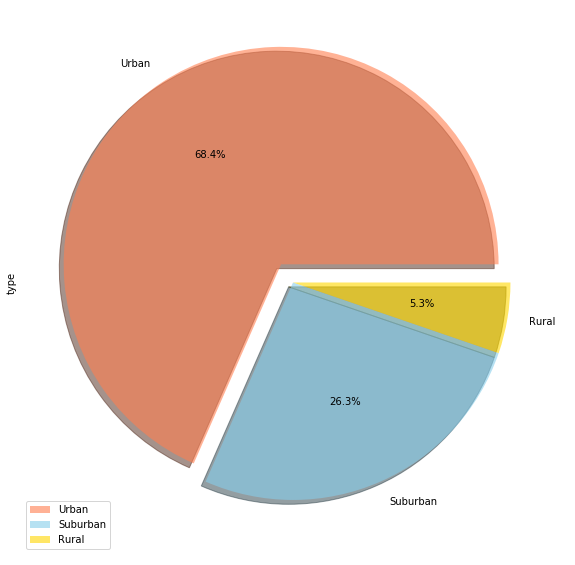

In [106]:
# Calculate Ride Percents
total = uber_data['ride_id'].count()
uber_data['type'].value_counts()

uber_data_counts = pd.DataFrame(uber_data['type'].value_counts())
rural_percent = 125/total
suburban_percent = 625/total
urban_percent = 1625/total

uber_data_counts

# Build Pie Chart
uber_data_counts.plot(kind='pie', y='type', legend='best', autopct='%0.001f%%', explode=[0.1,0,0],
                      shadow=True, figsize=(10,10), colors=['coral', 'skyblue', 'gold'], wedgeprops={'alpha':0.6})

# Save Figure
plt.savefig('Percentages of City Type')

In [107]:
# Show Figure
plt.show()

## Total Drivers by City Type

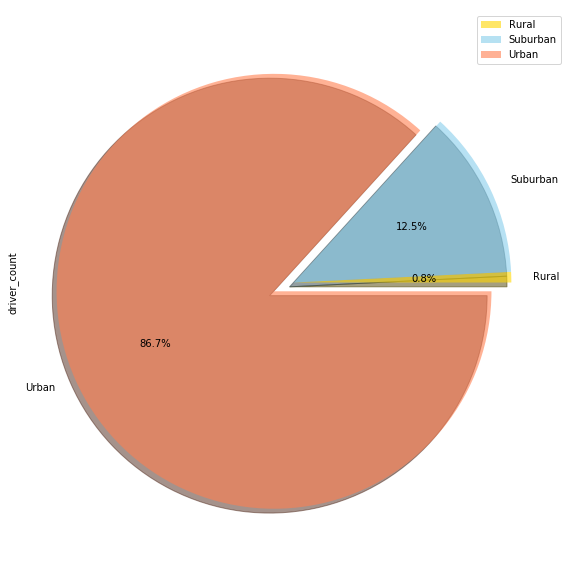

In [108]:
# Calculate Driver Percents
total = uber_data['driver_count'].sum()
uber_drivers_grouped = uber_data.groupby('type')
uber_drivers = pd.DataFrame(uber_drivers_grouped.sum())
uber_drivers

# Build Pie Charts
uber_drivers.plot(kind='pie', y='driver_count', legend='best', autopct='%0.001f%%', explode=[0,0,0.1],
                    shadow=True, figsize=(10,10), colors=['gold', 'skyblue', 'coral'], wedgeprops={'alpha':0.6})

# Save Figure

In [109]:
# Show Figure
plt.show()